# Speed Dating: Exploratory Data Analysis
- Objective: discover what are the attributes that lead to a second date.

## Imports

In [202]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import plotly.graph_objects as go
import random

# show all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [203]:
# import data from S3 bucket
path = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv"
speed_dating_data = pd.read_csv(path, encoding="cp1252")
df = speed_dating_data.copy()

## Data Exploration

In [204]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [205]:
# shape of data
print("rows", df.shape[0], "\ncolumns", df.shape[1])

rows 8378 
columns 195


In [206]:
# types of data
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [207]:
# datatypes and memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [208]:
# columns which are objects
df.select_dtypes(include="O").columns

Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')

In [209]:
# sample of objects
df.select_dtypes(include="O").sample(5)

,field,undergra,mn_sat,tuition,from,zipcode,income,career
1267,Chemistry,NaN,NaN,NaN,P. R. China,"300,151",NaN,I don't know
1335,Business (MBA),NaN,NaN,NaN,Bangladesh,0,NaN,Marketing
7503,MFA Acting Program,Tufts University,NaN,"26,892.00",Florida,"33,418","50,572.00",Actress
6408,business,Princeton,"1,460.00","27,230.00",New Jersey,"10,021","55,080.00",business
7531,sociology,Princeton University,"1,460.00","27,230.00",New York,"11,001","49,642.00",teacher and performer


In [210]:
# duplicates
df.duplicated().sum()

0

In [211]:
# convert objects to categories
df[["field", "undergra", "from", "zipcode", "career"]] = df[["field", "undergra", "from", "zipcode", "career"]].astype("category")

In [212]:
# show percentage of missing values for each variable
# sort by ascending order
missing_values_perc = (df.isna().sum()/len(df)*100).round(2) \
    .sort_values(ascending=True)

# use 5 spaces to randomize examples shown
missing_values_perc[0:200:10]

iid          0.00
idg          0.00
exercise     0.94
reading      0.94
gaming       0.94
pf_o_int     1.06
age_o        1.24
int_corr     1.89
prob_o       3.80
fun1_2      10.92
numdat_2    11.28
amb4_1      22.55
fun2_2      31.07
amb5_2      47.76
shar1_s     51.11
amb1_3      52.57
fun3_3      52.57
fun2_3      64.68
sinc7_3     75.94
amb7_2      76.67
dtype: float64

In [213]:
# average of missing values per column
df.isna().sum().mean().round(2)

2215.47

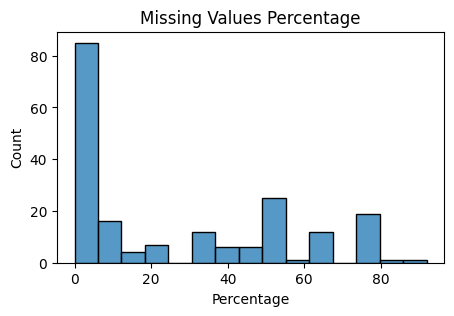

In [214]:
# make histogram to visualize missing values percentage
plt.figure(figsize=(5,3))
sns.histplot(missing_values_perc, bins=15)
plt.title("Missing Values Percentage")
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.show()

- It seems like most of our variables have less than 5% missing values,
but there are some in the 40-70% range that are necessary to look for. Those above it will not be used.
- It will be harder and unnecessary to do all variable treatment as of now, as not all variables will be used. It is better to wait and do it on only the necessary variables. Treatment will depend on the type, importance and percentage of missing values of each variable.

In [215]:
# variables with less than 33% missing values
missing_values_perc_33 = missing_values_perc[missing_values_perc < 33]
print("Count of variables:", len(missing_values_perc_33))

# percentage
missing_values_33_perc_total = len(missing_values_perc_33)/df.shape[1]
print("Percentage of variables with less than 33% missing values:", round(missing_values_33_perc_total,4)*100, "%")

Count of variables: 124
Percentage of variables with less than 33% missing values: 63.59 %


## Exploratory Data Analysis

In [216]:
# user defined function to give percentage of value counts
def value_counts(data, col):
    print("Percentage:", round(data[col].value_counts(1)*100, 2), "\nCount:", data[col].value_counts())

In [217]:
# test
value_counts(df, "gender")

Percentage: 1    50.06
0    49.94
Name: gender, dtype: float64 
Count: 1    4194
0    4184
Name: gender, dtype: int64


In [218]:
# user defined function to give percentage of value counts
def mean(data, col):
    print(f" {col} average:", round(data[col].mean(), 2))

In [219]:
# test
mean(df, "age")

 age average: 26.36


In [220]:
# user defined function to show percentage of missing values
def missing_values(data, col):
    print(((data[col].isna().sum() / len(df))*100).round(2), "% missing values")

In [221]:
# test
missing_values(df, "age_o")

1.24 % missing values


#### Correlations

In [222]:
# dataframe with only numerical variables
df_num = df.select_dtypes(include="number")
df_num.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5

In [223]:
# dataframe with 10 attributes with highest correlation to "match"
# exclude first attribute ("match")
pd.DataFrame(df_num.corr()["match"]).sort_values(by="match", ascending=False).round(2)[1:11]

,match
dec_o,0.52
dec,0.52
like_o,0.31
like,0.31
fun_o,0.28
fun,0.28
shar_o,0.27
shar,0.27
attr_o,0.26
attr,0.26


###### Insight 1
Most correlated attributes to match:
- Like rating
- Fun rating
- Shared interests rating
- Average of all attributes


In [224]:
# dataframe with 10 attributes with highest correlation to amount of dates("num_in_3")
pd.DataFrame(df_num.corr()["num_in_3"]).sort_values(by="num_in_3", ascending=False).round(2)[1:11]

,num_in_3
them_cal,0.60
you_call,0.59
fun4_1,0.50
intel2_2,0.40
intel4_3,0.38
fun3_s,0.37
sinc2_2,0.37
fun4_2,0.32
date_3,0.31
intel5_1,0.31


###### Insight 2
Most correlated attributes to amount of dates:
- Thinking "fun" is what people from same gender look for in opposite sex
- Thinking "intelligence" is what people from other gender look for in your sex
- Thinking "intelligence" is what people from same gender look for in opposite sex
- Rate themselves high in "fun"
- Thinking "sincerity" is what people from opposite gender look for in your sex




## Questions to be answered

#### How do interests correlate with getting a date, and if they do what are the highest correlated interests?

In [225]:
# create df with all interests and match
interests = df[["match", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]]

In [226]:
# missing values
interests.isna().sum().sum()

1343

In [227]:
# drop missing values
interests.dropna(inplace=True)
interests.isna().sum().sum()

0

In [228]:
# correlation with match
interest_match_corr = pd.DataFrame(interests.corr()["match"]).sort_values(by="match", ascending=False).round(2)
interest_match_corr

,match
match,1.00
clubbing,0.06
yoga,0.04
dining,0.03
art,0.03
concerts,0.03
hiking,0.02
music,0.02
sports,0.02
reading,0.02


<Axes: >

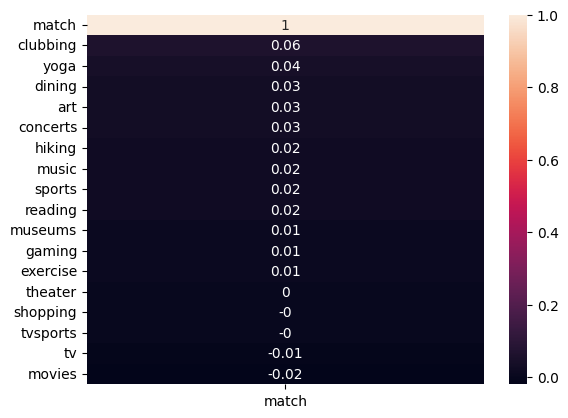

In [229]:
# correlation heatmap
sns.heatmap(interest_match_corr, annot=True)

In [230]:
# create dataframe with average rating for every interest, using an empty dictionary

interests_dict = {}

for col in interests.columns:
    mean = col, round(interests[col].mean(), 2)
    interests_dict[col] = pd.Series(mean)[1]

interests_df = pd.DataFrame.from_dict(interests_dict, orient="index")
interests_df.rename(columns={0: "rating"}, inplace=True)
interests_df.sort_values(by="rating", ascending=False)

,rating
movies,7.92
music,7.85
dining,7.78
reading,7.68
museums,6.99
concerts,6.83
theater,6.78
art,6.71
sports,6.43
exercise,6.25


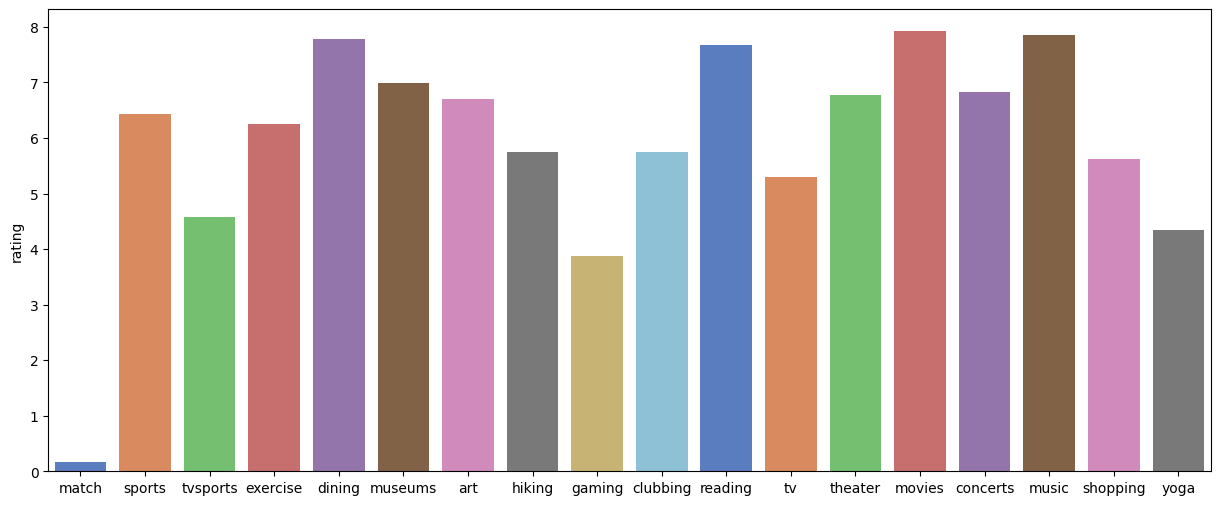

In [231]:
# countplot to compare ratings
plt.figure(figsize=(15,6))
sns.barplot(data=interests_df,
            x=interests_df.index,
            y="rating",
            palette="muted")
plt.show()

In [232]:
interests["gender"] = df["gender"]

# sort interests by men and women
female_interests = interests[interests["gender"]==0].mean() #.iloc[1:18]
male_interests = interests[interests["gender"]==1].mean()# .iloc[1:18]

frames = [female_interests, male_interests]

# dataframe of average of male and female interests, sorted descendingly by female interests
pd.concat(frames, axis=1).rename(columns={0:"female", 1:"male"}).round(2).sort_values(by="female", ascending=False)

,female,male
movies,8.20,7.64
dining,8.15,7.42
music,7.99,7.71
reading,7.91,7.45
theater,7.48,6.08
museums,7.43,6.55
art,7.22,6.22
concerts,7.10,6.55
shopping,6.50,4.77
exercise,6.45,6.04


#### What are the least desirable attributes in a male partner? Does this differ for female partners?

- To answer this question, we will look at the 6 different attributes from a survey that each participant answered before dating, where they distributed 100 points to rate the attributes.

In [233]:
# create dataframe with attributes
look_for = df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "wave"]]
# rename columns
look_for.rename(columns={"attr1_1":"attractiveness",
                         "sinc1_1":"sincerity",
                         "intel1_1":"intelligence",
                         "fun1_1":"fun",
                         "amb1_1":"ambitiousness",
                         "shar1_1":"shared_interests"
                         }, inplace=True)
look_for.head()

,attractiveness,sincerity,intelligence,fun,ambitiousness,shared_interests,wave
0,15.0,20.0,20.0,15.0,15.0,15.0,1
1,15.0,20.0,20.0,15.0,15.0,15.0,1
2,15.0,20.0,20.0,15.0,15.0,15.0,1
3,15.0,20.0,20.0,15.0,15.0,15.0,1
4,15.0,20.0,20.0,15.0,15.0,15.0,1


In [234]:
# missing values
look_for.isna().sum().sum()

546

In [235]:
# drop missing values
look_for.dropna(inplace=True)
look_for.isna().sum().sum()

0

In [236]:
# select waves 6 to 10 with a mask, to see if they are on same scale
look_for_waves_six_to_ten = look_for[(look_for["wave"]==6) | (look_for["wave"]==7) |\
 (look_for["wave"]==8) | (look_for["wave"]==9) | (look_for["wave"]==10)]

look_for_waves_six_to_ten["wave"].value_counts()

9     800
7     512
8     200
10    162
6      45
Name: wave, dtype: int64

- Waves 6 to 10 are on a scale from 1 to 10 while the rest are on a scale from 1 to 100, so that is something necessary to look out for.

In [237]:
# drop wave number
# not necessary anymore, as we already proved they are on the same scale
look_for.drop(["wave"], axis=1, inplace=True)
look_for.columns

Index(['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambitiousness',
       'shared_interests'],
      dtype='object')

In [238]:
# add seed to always obtain same sample
np.random.seed(42)
look_for_waves_six_to_ten.sample(10)

,attractiveness,sincerity,intelligence,fun,ambitiousness,shared_interests,wave
2450,15.22,17.39,17.39,17.39,15.22,17.39,8
3365,18.60,20.93,23.26,23.26,2.33,11.63,9
1966,18.18,18.18,18.18,18.18,13.64,13.64,7
1986,18.00,18.00,20.00,18.00,16.00,10.00,7
2190,16.00,18.00,18.00,18.00,14.00,16.00,7
2545,16.98,16.98,18.87,16.98,13.21,16.98,8
3311,21.43,16.67,21.43,16.67,11.90,11.90,9
2091,15.38,17.31,17.31,17.31,17.31,15.38,7
3517,35.00,20.00,10.00,20.00,10.00,5.00,10
2743,13.21,18.87,18.87,16.98,16.98,15.09,9


In [239]:
# create empty dictionary, then append average rating for every attribute
empty_dict = {}

for i in look_for.columns:
  empty_dict[i] = look_for[i].mean().round(2)

# convert to dataframe
before_attributes = pd.DataFrame.from_dict(empty_dict, orient="index")
# change column name
before_attributes.rename(columns={0:"average_rating"}, inplace=True)
# show
before_attributes

,average_rating
attractiveness,22.38
sincerity,17.42
intelligence,20.25
fun,17.47
ambitiousness,10.68
shared_interests,11.85


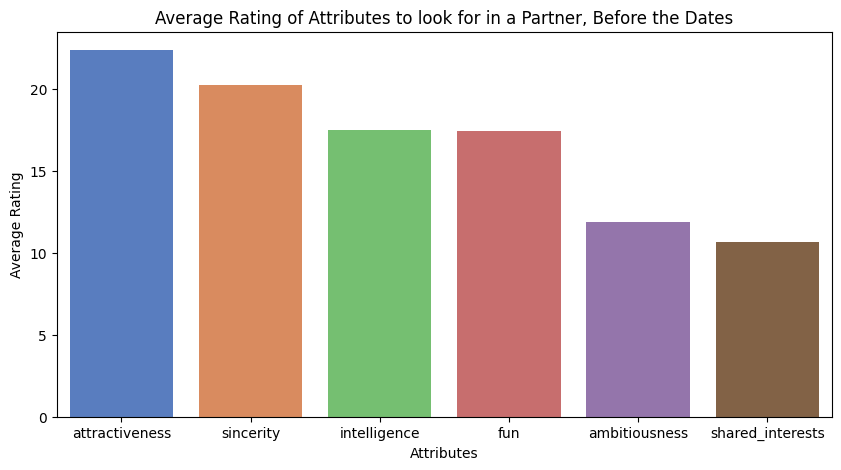

,average_rating
attractiveness,22.38
intelligence,20.25
fun,17.47
sincerity,17.42
shared_interests,11.85
ambitiousness,10.68


In [240]:
# barplot to represent average of attributes, sorted descendingly
attributes_list = before_attributes.index

plt.figure(figsize=(10,5))
sns.barplot(data=before_attributes.sort_values(by="average_rating", ascending=False),
            x=attributes_list,
            y="average_rating",
            palette="muted")

plt.title("Average Rating of Attributes to look for in a Partner, Before the Dates")
plt.xlabel("Attributes")
plt.ylabel("Average Rating")
plt.show()

display(before_attributes.sort_values(by="average_rating", ascending=False))

##### Do attributes change depending on gender?

In [241]:
# add gender column
look_for["gender"] = df["gender"]
look_for.head()

,attractiveness,sincerity,intelligence,fun,ambitiousness,shared_interests,gender
0,15.0,20.0,20.0,15.0,15.0,15.0,0
1,15.0,20.0,20.0,15.0,15.0,15.0,0
2,15.0,20.0,20.0,15.0,15.0,15.0,0
3,15.0,20.0,20.0,15.0,15.0,15.0,0
4,15.0,20.0,20.0,15.0,15.0,15.0,0


In [242]:
# create dataframes for male and female
look_for_female = look_for[look_for["gender"]==0]
look_for_male = look_for[look_for["gender"]==1]

- Female

In [243]:
# create empty dictionary, then append average rating for every attribute, for females
empty_dict = {}

for i in look_for_female.columns:
  empty_dict[i] = look_for_female[i].mean().round(2)

# convert to dataframe
female_attributes = pd.DataFrame.from_dict(empty_dict, orient="index")
# change column name
female_attributes.rename(columns={0:"average_rating"}, inplace=True)
# drop gender row
female_attributes = female_attributes[0:6]
# show
female_attributes.sort_values(by="average_rating", ascending=False)

,average_rating
intelligence,20.95
sincerity,18.35
attractiveness,17.94
fun,17.19
ambitiousness,12.84
shared_interests,12.70


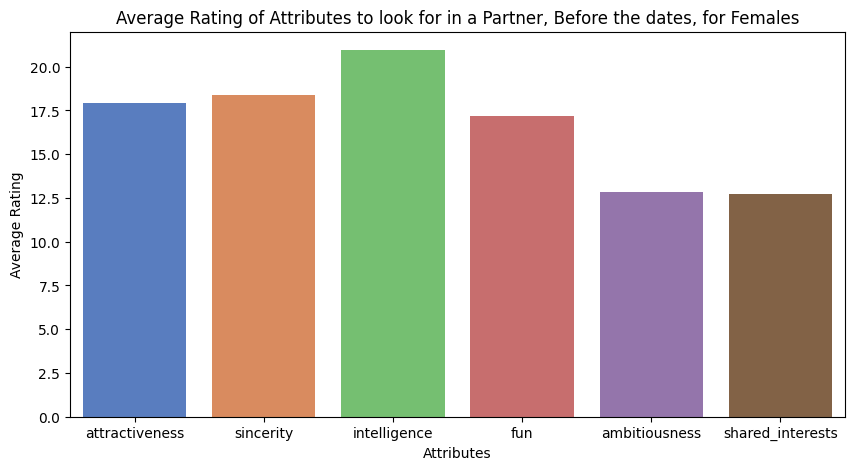

,average_rating
intelligence,20.95
sincerity,18.35
attractiveness,17.94
fun,17.19
ambitiousness,12.84
shared_interests,12.70


In [244]:
# barplot to represent average of attributes, sorted descendingly
plt.figure(figsize=(10,5))
sns.barplot(data=female_attributes,
            x=female_attributes.index,
            y="average_rating",
            palette="muted")

plt.title("Average Rating of Attributes to look for in a Partner, Before the dates, for Females")
plt.xlabel("Attributes")
plt.ylabel("Average Rating")
plt.show()

display(female_attributes.sort_values(by="average_rating", ascending=False))

- Males

In [245]:
# create empty dictionary, then append average rating for every attribute, for males
empty_dict = {}

for i in look_for_male.columns:
  empty_dict[i] = look_for_male[i].mean().round(2)

# convert to dataframe
male_attributes = pd.DataFrame.from_dict(empty_dict, orient="index")
# change column name
male_attributes.rename(columns={0:"average_rating"}, inplace=True)
# drop gender row
male_attributes = male_attributes[0:6]
# show
display(male_attributes)

,average_rating
attractiveness,26.76
sincerity,16.51
intelligence,19.56
fun,17.76
ambitiousness,8.55
shared_interests,11.00


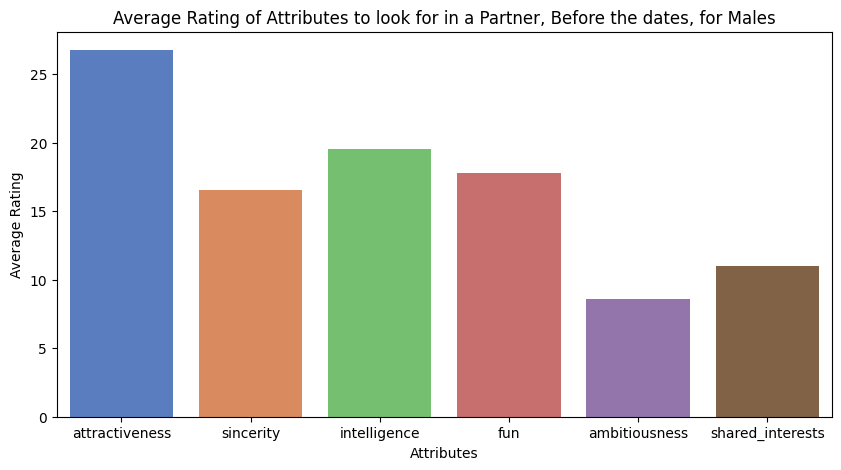

,average_rating
attractiveness,26.76
intelligence,19.56
fun,17.76
sincerity,16.51
shared_interests,11.00
ambitiousness,8.55


In [246]:
# barplot to represent average of attributes, sorted descendingly
attributes_list = male_attributes.index

plt.figure(figsize=(10,5))
sns.barplot(data=male_attributes,
            x=attributes_list,
            y="average_rating",
            palette="muted")

plt.title("Average Rating of Attributes to look for in a Partner, Before the dates, for Males")
plt.xlabel("Attributes")
plt.ylabel("Average Rating")
plt.show()

display(male_attributes.sort_values(by="average_rating", ascending=False))

- Comparison

In [247]:
# rename columns, in order to have comparison
# they are named the same in both dataframes, so we will
# avoid confusion by changing name
male_attributes.rename(columns={"average_rating":"male"},inplace=True)
female_attributes.rename(columns={"average_rating":"female"},inplace=True)

In [248]:
# concatenate dataframes through columns
frames = [female_attributes, male_attributes]
gender_comparison = pd.concat(frames, axis=1)

display(gender_comparison)

,female,male
attractiveness,17.94,26.76
sincerity,18.35,16.51
intelligence,20.95,19.56
fun,17.19,17.76
ambitiousness,12.84,8.55
shared_interests,12.70,11.00


In [249]:
# add difference, from females point of view
gender_comparison["difference"] = gender_comparison["female"] - gender_comparison["male"]
# show
display(gender_comparison)

,female,male,difference
attractiveness,17.94,26.76,-8.82
sincerity,18.35,16.51,1.84
intelligence,20.95,19.56,1.39
fun,17.19,17.76,-0.57
ambitiousness,12.84,8.55,4.29
shared_interests,12.70,11.00,1.70


- We should read this as "women on average rate _attribute_ __ points lower/higher than men"
- Example: "women on average rate atractiveness 8.86 lower than men"

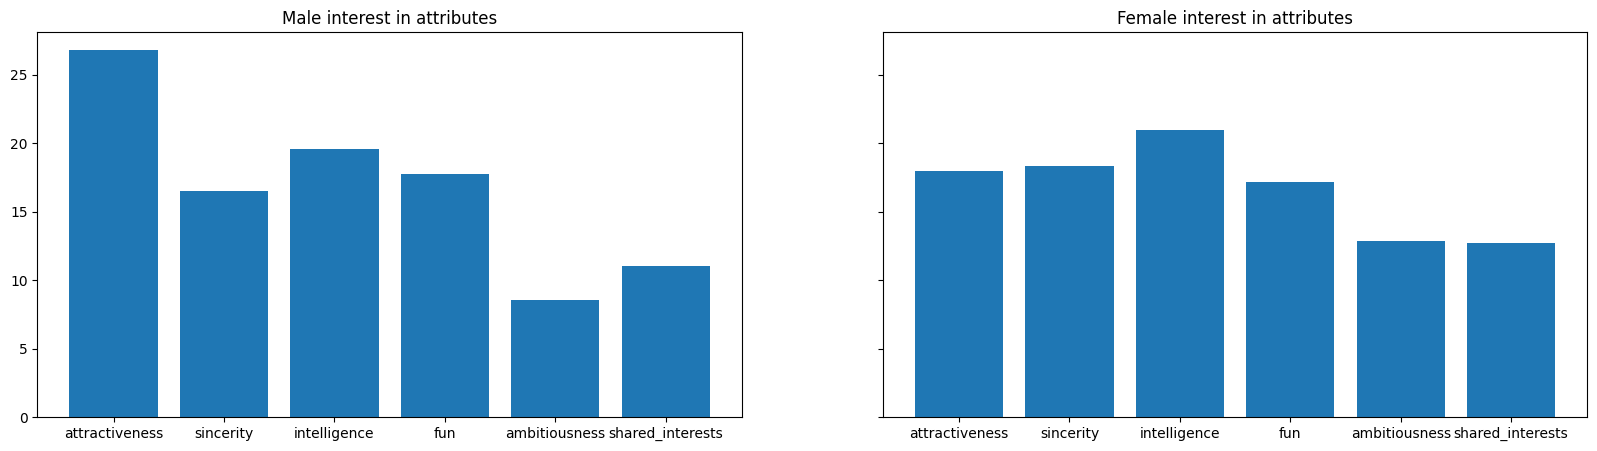

In [250]:
# comparison of attributes, side by side

# create subplot axes
fig, (ax1, ax2) = plt.subplots(1,2, sharey="row", sharex="row")
# set figure size
fig.set_figwidth(20)
fig.set_figheight(5)

# first plot
ax1.bar(data=gender_comparison,
        x=gender_comparison.index,
        height="male")
ax1.set_title("Male interest in attributes")

ax2.bar(data=gender_comparison,
        x=gender_comparison.index,
        height="female")
ax2.set_title("Female interest in attributes")

plt.show()

In [251]:
# standard deviations, to compare dispersion of ratings
print(f"female standard deviation", gender_comparison["female"].std().round(2))
print(f"male standard deviation", gender_comparison["male"].std().round(2))

female standard deviation 3.27
male standard deviation 6.47


###### Insight 3
We can conclude from our analysis the following insights:
1. Atractiveness and Sincerity are the most important attributes that people look out for in a partner, while Ambitiousness and Shared Interests are the ones that matter the least.
2. Men focus mostly on Atractiveness and Intelligence, while women focus mostly on Intelligence and Sincerity.
3. Atractiveness and Ambitiousness are the traits that have the most difference between both genders. Men rated Atractiveness on average 8.86 points higher than women, while the latter rated on average Ambitiousness 4.28 than the former.
4. Women have a more balanced approach than men when it comes to rating attributes, as the standard deviation for women is 3.29 while for men it is 6.52. This means men have a lot more focus on a single or a few traits, while women place value in all attributes.

#### How important do people think attractiveness is in potential mate selection vs. its real impact?
- We now know Atractiveness rates as the most important attribute in partner selection according to participants. This is before having a date, will people answer the same after the date?

In [252]:
# scorecard answered by participants for every date
scorecard = df[["dec", "attr", "sinc", "intel", "fun", "amb", "shar", "like", "prob"]]

# rating of attributes halfway through event
halfway = df[["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]]

# rating og attributes the day after event
followup = df[["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"]]

# display all three dataframes
np.random.seed(42)
display(scorecard.sample(5))
print()
display(halfway.sample(5))
print()
display(followup.sample(5))

,dec,attr,sinc,intel,fun,amb,shar,like,prob
4730,0,4.0,8.0,6.0,6.0,6.0,4.0,4.0,5.0
8168,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333,1,10.0,8.0,8.0,9.0,8.0,NaN,9.0,9.0
5426,0,4.0,7.0,7.0,6.0,8.0,4.0,5.0,4.0
5407,1,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN


,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
485,NaN,NaN,NaN,NaN,NaN,NaN
6093,17.00,20.00,20.00,21.00,10.00,12.00
2571,19.57,19.57,17.39,21.74,10.87,10.87
2139,14.58,16.67,16.67,16.67,18.75,16.67
5396,NaN,NaN,NaN,NaN,NaN,NaN


,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2
6373,NaN,NaN,NaN,NaN,NaN,NaN
2290,NaN,NaN,NaN,NaN,NaN,NaN
1102,NaN,NaN,NaN,NaN,NaN,NaN
5891,15.0,20.0,20.0,15.0,15.0,15.0
6783,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
# rename halfway columns
halfway.rename(columns={"attr1_s":"attractiveness",
                         "sinc1_s":"sincerity",
                         "intel1_s":"intelligence",
                         "fun1_s":"fun",
                         "amb1_s":"ambitiousness",
                         "shar1_s":"shared_interests"
                         }, inplace=True)

In [254]:
# average of percentage of missing values for each dataframe
display("scorecard:", (scorecard.isna().sum()*100 / len(df)).mean().round(2))
print()
display("halfway:", (halfway.isna().sum()*100 / len(df)).mean().round(2))
print()
display("followup:", (followup.isna().sum()*100 / len(df)).mean().round(2))

'scorecard:'

4.58

'halfway:'

51.11

'followup:'

76.45

- From the missing values we can see that very few people answer the _followup_ questionnaire. It might give us some insights, but not very solid for conclusions.
- The _scorecard_ dataframe will be the most useful source of data for this question, as it is the more reliable with the least missing values.

In [255]:
# drop missing values
scorecard.dropna(inplace=True)
followup.dropna(inplace=True)

In [256]:
# create empty dictionary, then append average rating for every attribute after
followup_dict = {}

for i in followup.columns:
  followup_dict[i] = followup[i].mean().round(2)

# convert to dataframe
followup_attributes = pd.DataFrame.from_dict(followup_dict, orient="index")
# change column name
followup_attributes.rename(columns={0:"average_rating"}, inplace=True)
# show
display(followup_attributes)

,average_rating
attr7_2,32.47
sinc7_2,13.53
intel7_2,15.13
fun7_2,18.70
amb7_2,7.29
shar7_2,12.18


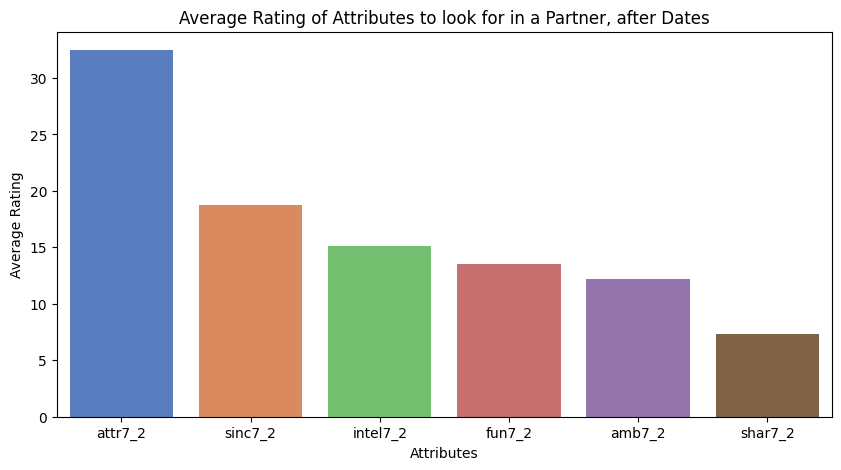

,average_rating
attr7_2,32.47
fun7_2,18.70
intel7_2,15.13
sinc7_2,13.53
shar7_2,12.18
amb7_2,7.29


In [257]:
# barplot to represent average of attributes after
attributes_list = followup_attributes.index

plt.figure(figsize=(10,5))
sns.barplot(data=followup_attributes.sort_values(by="average_rating", ascending=False),
            x=attributes_list,
            y="average_rating",
            palette="muted")

plt.title("Average Rating of Attributes to look for in a Partner, after Dates")
plt.xlabel("Attributes")
plt.ylabel("Average Rating")
plt.show()

display(followup_attributes.sort_values(by="average_rating", ascending=False))

- Comparison

In [258]:
# rename followup index, in order to join with "before" dataframe
followup_attributes.rename(index={"attr7_2":"attractiveness",
                                  "sinc7_2":"sincerity",
                                  "intel7_2":"intelligence",
                                  "fun7_2":"fun",
                                  "amb7_2":"ambitiousness",
                                  "shar7_2":"shared_interests"
                                  },
                                  inplace=True)

display(followup_attributes)

,average_rating
attractiveness,32.47
sincerity,13.53
intelligence,15.13
fun,18.70
ambitiousness,7.29
shared_interests,12.18


In [259]:
# rename "average_rating" column in before and after attributes,
# so we do not confuse both dataframes, in other words to identify them
before_attributes.rename(columns={"average_rating":"before"}, inplace=True)
followup_attributes.rename(columns={"average_rating":"after"}, inplace=True)
# concatenate dataframes
frames = [before_attributes, followup_attributes]
before_after_comparison = pd.concat(frames, axis=1)
# add difference column, to compare how the expectations have changed
before_after_comparison["difference"] = before_after_comparison["after"] - before_after_comparison["before"]
# show
display(before_after_comparison)

,before,after,difference
attractiveness,22.38,32.47,10.09
sincerity,17.42,13.53,-3.89
intelligence,20.25,15.13,-5.12
fun,17.47,18.70,1.23
ambitiousness,10.68,7.29,-3.39
shared_interests,11.85,12.18,0.33


- Read chart from point of view at the end of the dates.
- There is a difference of "people view attribute x as __ points more/less important than before the dates"
- Example: "People view atractiveness as 10.09 points more important for choosing a partner, in comparison to before the dates"

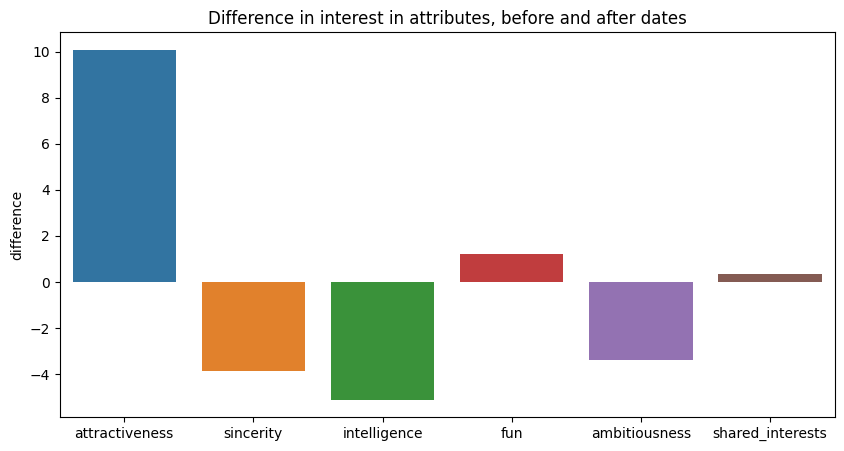

In [260]:
plt.figure(figsize=(10,5))
sns.barplot(data=before_after_comparison,
            x=before_after_comparison.index,
            y="difference")
plt.title("Difference in interest in attributes, before and after dates")
plt.show()

###### Insight 4
- After the events people value atractiveness way higher than before the dates. Sincerity and intelligence had an important drop, while ambitiousness is even less important.
- This might be due to the nature of the event, as people only have a few minutes to discuss and can't get to know each other well, so they use atractiveness as a filter to decide who they want to know better.
- It is interesting, because we now know that atractiveness is the most important feature leading to a match. We shall explore this further.

##### Impact of atractiveness in decision

In [261]:
atr_rating_yes = scorecard[scorecard["dec"]==1]["attr"].mean().round(2)
atr_rating_no = scorecard[scorecard["dec"]==0]["attr"].mean().round(2)
atr_diff_rating = (atr_rating_yes - atr_rating_no).round(2)

atr_rating_yes,atr_rating_no
print(f'Participants who decides "yes" gave their partner an atractiveness rating of {atr_rating_yes}, while participants\n who decided "no" rated their partners {atr_rating_no}. That makes a difference of {atr_diff_rating} points in atractiveness.')

Participants who decides "yes" gave their partner an atractiveness rating of 7.28, while participants
 who decided "no" rated their partners 5.37. That makes a difference of 1.91 points in atractiveness.


- Based on this statistic, we might say that if your partner finds you attractive your probability of being "yes" increase by 19.1%.

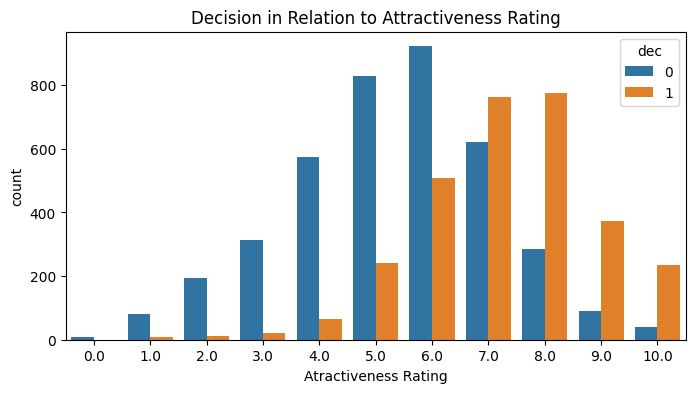

In [262]:
# plot compare decision to attractiveness rating given by partner
plt.figure(figsize=(8,4))
# round up as there are many decimals
sns.countplot(x=scorecard["attr"].round(),
              hue=scorecard["dec"])

plt.title("Decision in Relation to Attractiveness Rating")
plt.xlabel("Atractiveness Rating")
plt.show()

- The 50% probability threshold is broken when you get to a 7 atractiveness rating, with 55% chance of decision being yes.

In [263]:
# calculate probability of decision according to atractiveness rating
# probability is calculated using relative frequency
empty_dict = {}
for i in np.arange(0,11):
  empty_dict[i] = (1 - scorecard[scorecard["attr"]==i]["dec"].value_counts(1)[0]).round(2)

display(empty_dict)

{0: 0.0,
 1: 0.09,
 2: 0.06,
 3: 0.06,
 4: 0.1,
 5: 0.23,
 6: 0.35,
 7: 0.55,
 8: 0.73,
 9: 0.8,
 10: 0.86}

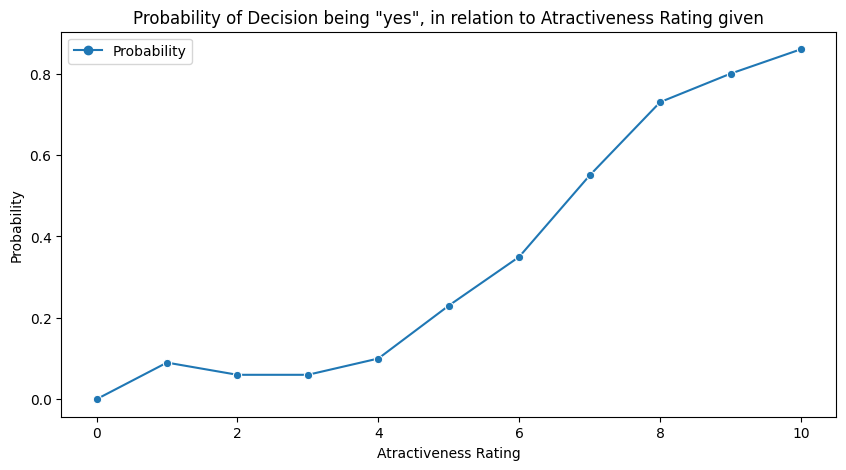

,Probability
0,0.00
1,0.09
2,0.06
3,0.06
4,0.10
5,0.23
6,0.35
7,0.55
8,0.73
9,0.80


In [264]:
# probability dataframe
probability_attr_rating = pd.DataFrame.from_dict(empty_dict, orient="index")
probability_attr_rating.rename(columns={0:"Probability"}, inplace=True)

# lineplot
plt.figure(figsize=(10,5))
sns.lineplot(data=probability_attr_rating,
             markers=True)
plt.title('Probability of Decision being "yes", in relation to Atractiveness Rating given')
plt.xlabel("Atractiveness Rating")
plt.ylabel("Probability")
plt.show()

print()
display(probability_attr_rating)

In [265]:
# correlation

# drop "like" and "prob"
scorecard.drop(["like", "prob"], axis=1, inplace=True)
# correlation to decision
scorecard.corr()["dec"].round(2)

dec      1.00
attr     0.49
sinc     0.21
intel    0.21
fun      0.41
amb      0.18
shar     0.40
Name: dec, dtype: float64

###### Insight 5
Atractiveness has a really strong impact on the decision a participant makes.


- Participants who decides "yes" gave their partner an atractiveness rating of 7.28, while participants who decided "no" rated their partners 5.37. That makes a difference of 1.91 points in atractiveness.
- Expectations are tempered halfway through the dates. Difference between total rating points before dating and after dating is 7.85, probably implying that participants enter with very high expectations.
- The correlation between decision and attractiveness is moderately strong, with a Pearson coefficient of 0.49, highest between all six attributes.
- Very interesting insight: people do not seem to think shared interests are an important attribute, but it is the second highest correlated to a "yes" decision after attractiveness, slightly ahead of fun. In other words, shared interests affect a match way more than people think.

#### Can people accurately predict their own perceived value in the dating market?

In [266]:
# probability a participant thinks partner will say "yes"
prob_yes = df[["prob", "dec", "gender"]]
prob_yes.head()

,prob,dec,gender
0,6.0,1,0
1,5.0,1,0
2,NaN,1,0
3,6.0,1,0
4,6.0,1,0


In [267]:
prob_yes["prob"] = prob_yes["prob"].round()

In [268]:
prob_yes["prob"].value_counts()

5.0     1799
6.0     1403
7.0     1130
4.0      936
3.0      708
8.0      659
2.0      540
1.0      415
9.0      241
10.0     189
0.0       49
Name: prob, dtype: int64

In [269]:
prob_yes.dropna(inplace=True)
prob_yes.isna().sum().sum()

0

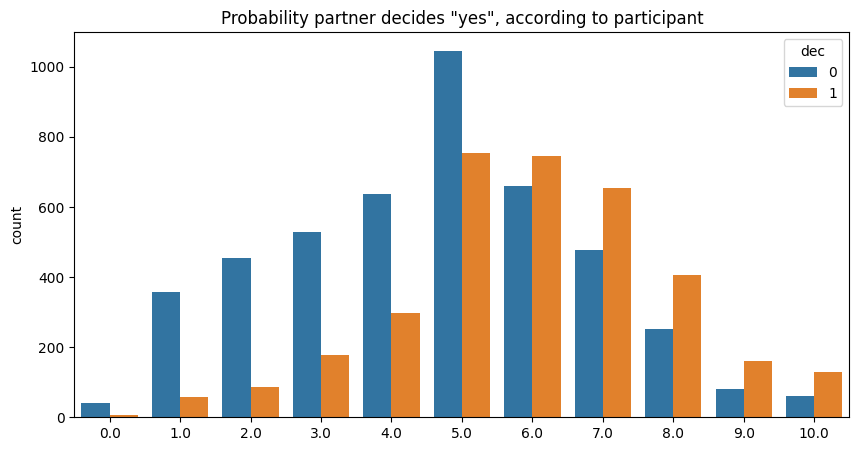

In [270]:
# probability that participant gives to partner for them to decide "yes"

plt.figure(figsize=(10,5))
sns.countplot(x=df["prob"].round(),
              hue=df["dec"])

plt.title('Probability partner decides "yes", according to participant')
plt.xlabel("")
plt.show()

###### Insight 6
- This chart tells us that people are very perceptive of when they are liked by their partner. Blue means the partner decided _no_, while orange means their partner decided _yes_.
- Most of them got the "prediction" right, as we can see low numbers are mostly blue while medium to high numbers are mostly orange.
- The threshold of 50% "yes" is broken at a probability of 6, meaning that if a participant rates the probability at 6 he or she gets a 53% chance of having a _yes_.

In [271]:
# accuracy of participants on whether partner will decide "yes", according
# to the probability they gave to their partner to decide "yes"
empty_dict = {}
for i in np.arange(0,11):
  empty_dict[i] = (df[df["prob"]==i]["dec"].value_counts(1)[1]).round(2)
prob_rating = pd.DataFrame.from_dict(empty_dict, orient="index")
prob_rating.rename(columns={0:"probability"}, inplace=True)
display(prob_rating)

,probability
0,0.14
1,0.14
2,0.16
3,0.25
4,0.32
5,0.42
6,0.53
7,0.58
8,0.62
9,0.66


<Axes: >

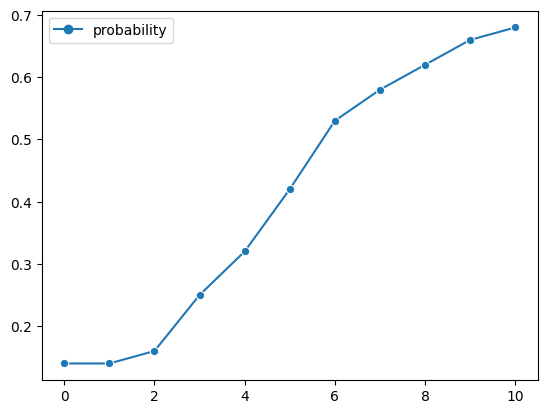

In [272]:
# plot on accuracy
sns.lineplot(prob_rating, markers=True)

- The way we would read this chart is "participants who gave their partner a probability of 10/10 to make a _yes_ decision on them got a _yes_ from their partners 68% of the time.".
- It is evident that as the rating of probability accuracy increases along with the chances of obtaining a _yes_.

##### How do participants rate themselves?

In [273]:
self_rating = df[["attr3_2", "sinc3_2", "intel3_2", "fun3_2", "amb3_2"]]
self_rating.head()

,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,6.0,7.0,8.0,7.0,6.0
1,6.0,7.0,8.0,7.0,6.0
2,6.0,7.0,8.0,7.0,6.0
3,6.0,7.0,8.0,7.0,6.0
4,6.0,7.0,8.0,7.0,6.0


In [274]:
# missing values
self_rating.isna().sum().sum()

4575

In [275]:
# drop missing values
self_rating.dropna(inplace=True)
self_rating.isna().sum().sum()

0

In [276]:
# compute average rating for a person's attributes, rated by themselves
self_rating_avg = self_rating.mean().mean().round(2)
self_rating_std = self_rating.std().std().round(2)

# compute average for the other person's attributes, given by partner
partner_rating_avg = df["attr_o"].mean().round(2)
partner_rating_std = df["attr_o"].std().round(2)

# show self rating mean and standard deviation
display(print(f"Self rating:\n average: {self_rating_avg}, \n standard deviation: {self_rating_std}"))
# show self rating mean and standard deviation
display(print(f"Partner rating:\n average: {partner_rating_avg}, \n standard deviation: {partner_rating_std}"))

Self rating:
 average: 7.68, 
 standard deviation: 0.21


None

Partner rating:
 average: 6.19, 
 standard deviation: 1.95


None

In [277]:
# create column to average a participant's self rating
self_rating["average"] = self_rating.mean(axis=1)
self_rating["average"].head()

0    6.8
1    6.8
2    6.8
3    6.8
4    6.8
Name: average, dtype: float64

In [278]:
# add gender column to self_rating
self_rating["gender"] = df["gender"]
self_rating.head()

,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,average,gender
0,6.0,7.0,8.0,7.0,6.0,6.8,0
1,6.0,7.0,8.0,7.0,6.0,6.8,0
2,6.0,7.0,8.0,7.0,6.0,6.8,0
3,6.0,7.0,8.0,7.0,6.0,6.8,0
4,6.0,7.0,8.0,7.0,6.0,6.8,0


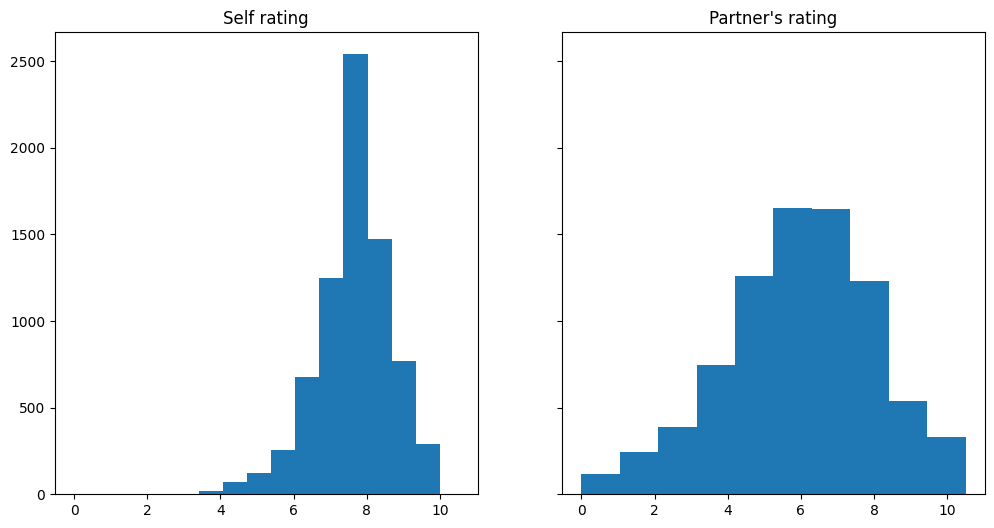

Average self rating: 7.68, and standard deviation: 0.21
Average partner's rating: 6.19, and standard deviation: 1.95


In [279]:
# histogram comparing self rating and partner's rating
fig, (ax1, ax2) = plt.subplots(1, 2, sharey="row", sharex="row")
fig.set_figheight(6)
fig.set_figwidth(12)

# first plot
ax1.hist(data=self_rating,
        x="average")
ax1.set_title("Self rating")

# second plot
ax2.hist(data=df,
          x="attr_o")
ax2.set_title("Partner's rating")

plt.show()

print(f"Average self rating: {self_rating_avg}, and standard deviation: {self_rating_std}")
print(f"Average partner's rating: {partner_rating_avg}, and standard deviation: {partner_rating_std}")

In [280]:
rating_avg_diff = (self_rating_avg - partner_rating_avg).round(2)
print(f"Participants rate themselves on average {rating_avg_diff} points higher than their partners rate them (the average for all 6 attributes. \nThis indicates us that in fact, people rate themselves higher than they are perceived." )

Participants rate themselves on average 1.49 points higher than their partners rate them (the average for all 6 attributes. 
This indicates us that in fact, people rate themselves higher than they are perceived.


###### Insight 7
- Participants tend to have a higher opinion of themselves than their partners do. On average, the partner rates a participant 1.49 lower than the parcicipant rates himself.

##### Does self rating change depending on gender?

In [281]:
# average for only 5 attributes (w/o shared interests)
# exclude "gender" and "average" columns from average using a slice
print("Average self rating for FEMALES, for all 6 attributes:", self_rating[self_rating["gender"]==0].mean()[0:5].mean().round(2))
print("Average self rating for MALES, for all 6 attributes:", self_rating[self_rating["gender"]==1].mean()[0:5].mean().round(2))

Average self rating for FEMALES, for all 6 attributes: 7.75
Average self rating for MALES, for all 6 attributes: 7.6


#### Does profession have any relationship with match?

In [282]:
# attractiveness by career

attr_career = pd.DataFrame(df.groupby(by="career_c").mean()["attr"].round(2)).sort_values(by="attr", ascending=False).reset_index()

# rename encoded categories to name of career
attr_career["career_c"] = attr_career["career_c"].replace(1, "Lawyer")
attr_career["career_c"] = attr_career["career_c"].replace(2, "Academic")
attr_career["career_c"] = attr_career["career_c"].replace(3, "Psychologist")
attr_career["career_c"] = attr_career["career_c"].replace(4, "Doctor")
attr_career["career_c"] = attr_career["career_c"].replace(5, "Engineer")
attr_career["career_c"] = attr_career["career_c"].replace(6, "Entertainment")
attr_career["career_c"] = attr_career["career_c"].replace(7, "Business")
attr_career["career_c"] = attr_career["career_c"].replace(8, "Real Estate")
attr_career["career_c"] = attr_career["career_c"].replace(9, "Humanitarian Affairs")
attr_career["career_c"] = attr_career["career_c"].replace(10, "Undecided")
attr_career["career_c"] = attr_career["career_c"].replace(11, "Social Work")
attr_career["career_c"] = attr_career["career_c"].replace(12, "Speech Pathology")
attr_career["career_c"] = attr_career["career_c"].replace(13, "Politics")
attr_career["career_c"] = attr_career["career_c"].replace(14, "Athletics")
attr_career["career_c"] = attr_career["career_c"].replace(15, "Other")
attr_career["career_c"] = attr_career["career_c"].replace(16, "Journalism")
attr_career["career_c"] = attr_career["career_c"].replace(17, "Architecture")

display(attr_career)

,career_c,attr
0,Athletics,6.89
1,Real Estate,6.82
2,Lawyer,6.45
3,Other,6.41
4,Academic,6.35
5,Psychologist,6.33
6,Entertainment,6.32
7,Politics,6.29
8,Business,6.13
9,Undecided,6.13


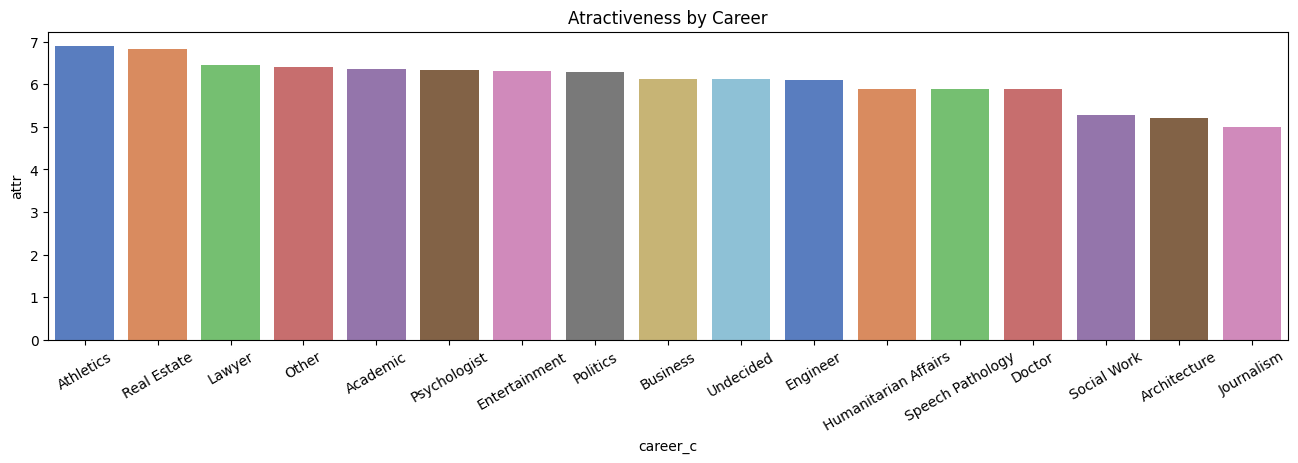

In [283]:
plt.figure(figsize=(16,4))
sns.barplot(data=attr_career,
            x="career_c",
            y="attr",
            palette="muted")
plt.xticks(rotation=30)
plt.title("Atractiveness by Career")
plt.show()

In [284]:
# frequentist probability of matches for each profession
career_match_dict = {}
for i in np.arange(1,18):
    profession_match = round(df[df["career_c"]==i]["match"].value_counts(1)*100, 2)
    career_match_dict[i] = profession_match[1]

display(career_match_dict)

{1: 19.85,
 2: 15.52,
 3: 20.69,
 4: 16.63,
 5: 15.38,
 6: 15.88,
 7: 17.97,
 8: 12.82,
 9: 14.44,
 10: 12.66,
 11: 15.91,
 12: 3.57,
 13: 7.41,
 14: 30.0,
 15: 16.88,
 16: 18.18,
 17: 10.0}

In [285]:
# amount of people in each career
quant_dict = {}
for i in np.arange(1,18):
    length = len(df[df["career_c"]==i]["match"])
    quant_dict[i] = length

quant = pd.Series(quant_dict)
display(quant)

1      675
2     2320
3      261
4      421
5      234
6      724
7     2170
8       39
9      547
10     379
11     220
12      28
13      81
14      10
15      77
16      44
17      10
dtype: int64

In [286]:
# convert percentage to dataframe
profession_match = pd.DataFrame.from_dict(career_match_dict, orient="index")
display(profession_match)

,0
1,19.85
2,15.52
3,20.69
4,16.63
5,15.38
6,15.88
7,17.97
8,12.82
9,14.44
10,12.66


In [287]:
# rename column
profession_match.rename(columns={0: "match_percentage"}, inplace=True)

In [288]:
# add quantity of people in each career to dataframe
profession_match["quantity"] = quant
display(profession_match)

,match_percentage,quantity
1,19.85,675
2,15.52,2320
3,20.69,261
4,16.63,421
5,15.38,234
6,15.88,724
7,17.97,2170
8,12.82,39
9,14.44,547
10,12.66,379


In [289]:
# replace index number with career
profession_match = profession_match.reset_index()
profession_match.rename(columns={"index":"career"}, inplace=True)
display(profession_match)

,career,match_percentage,quantity
0,1,19.85,675
1,2,15.52,2320
2,3,20.69,261
3,4,16.63,421
4,5,15.38,234
5,6,15.88,724
6,7,17.97,2170
7,8,12.82,39
8,9,14.44,547
9,10,12.66,379


In [290]:
# replace numbers with values
profession_match["career"] = profession_match["career"].replace(1, "Lawyer")
profession_match["career"] = profession_match["career"].replace(2, "Academic")
profession_match["career"] = profession_match["career"].replace(3, "Psychologist")
profession_match["career"] = profession_match["career"].replace(4, "Doctor")
profession_match["career"] = profession_match["career"].replace(5, "Engineer")
profession_match["career"] = profession_match["career"].replace(6, "Entertainment")
profession_match["career"] = profession_match["career"].replace(7, "Business")
profession_match["career"] = profession_match["career"].replace(8, "Real Estate")
profession_match["career"] = profession_match["career"].replace(9, "Humanitarian Affairs")
profession_match["career"] = profession_match["career"].replace(10, "Undecided")
profession_match["career"] = profession_match["career"].replace(11, "Social Work")
profession_match["career"] = profession_match["career"].replace(12, "Speech Pathology")
profession_match["career"] = profession_match["career"].replace(13, "Politics")
profession_match["career"] = profession_match["career"].replace(14, "Athletics")
profession_match["career"] = profession_match["career"].replace(15, "Other")
profession_match["career"] = profession_match["career"].replace(16, "Journalism")
profession_match["career"] = profession_match["career"].replace(17, "Architecture")

In [291]:
# sort by highest to lowest match_percentage, by profession
# minimum 50 people in career
profession_match[profession_match["quantity"]>50].sort_values(by="match_percentage", ascending=False).reset_index(drop=True)

,career,match_percentage,quantity
0,Psychologist,20.69,261
1,Lawyer,19.85,675
2,Business,17.97,2170
3,Other,16.88,77
4,Doctor,16.63,421
5,Social Work,15.91,220
6,Entertainment,15.88,724
7,Academic,15.52,2320
8,Engineer,15.38,234
9,Humanitarian Affairs,14.44,547


In [292]:
# create new dataframe with income and career
income_df = df[["income", "career_c"]]
income_df.head()

,income,career_c
0,"69,487.00",NaN
1,"69,487.00",NaN
2,"69,487.00",NaN
3,"69,487.00",NaN
4,"69,487.00",NaN


In [293]:
# missing values
income_df.isna().sum().sum()

4237

In [294]:
income_df.dropna(inplace=True)
income_df.isna().sum().sum()

0

In [295]:
# remove commas and periods from integers
# replace symbols with white space
for i in range(len(income_df["income"])):
  income_df["income"].iloc[i] = income_df["income"].iloc[i].replace(",", "")
  income_df["income"].iloc[i] = income_df["income"].iloc[i].replace(".", "")
  # remove last two "0"s using slice
  income_df["income"].iloc[i] = income_df["income"].iloc[i][:-2]

In [296]:
income_df.head()

,income,career_c
30,37754,1.0
31,37754,1.0
32,37754,1.0
33,37754,1.0
34,37754,1.0


In [297]:
# rename column
income_df.rename(columns={"career_c":"career"}, inplace=True)

In [298]:
# convert income to float
income_df["income"] = income_df["income"].astype("float64")

In [300]:
income_df.groupby(["career"]).mean()["income"].round(2)

career
1.0     43222.64
2.0     45560.78
3.0     47372.53
4.0     37783.44
5.0     38852.27
6.0     42899.51
7.0     46875.61
8.0     40133.57
9.0     49488.08
10.0    44477.54
11.0    37618.60
12.0    47016.00
13.0    19264.00
14.0    53940.00
15.0    61807.49
16.0    20000.00
Name: income, dtype: float64

In [301]:
# replace numbers with values
income_df["career"] = income_df["career"].replace(1, "Lawyer")
income_df["career"] = income_df["career"].replace(2, "Academic")
income_df["career"] = income_df["career"].replace(3, "Psychologist")
income_df["career"] = income_df["career"].replace(4, "Doctor")
income_df["career"] = income_df["career"].replace(5, "Engineer")
income_df["career"] = income_df["career"].replace(6, "Entertainment")
income_df["career"] = income_df["career"].replace(7, "Business")
income_df["career"] = income_df["career"].replace(8, "Real Estate")
income_df["career"] = income_df["career"].replace(9, "Humanitarian Affairs")
income_df["career"] = income_df["career"].replace(10, "Undecided")
income_df["career"] = income_df["career"].replace(11, "Social Work")
income_df["career"] = income_df["career"].replace(12, "Speech Pathology")
income_df["career"] = income_df["career"].replace(13, "Politics")
income_df["career"] = income_df["career"].replace(14, "Athletics")
income_df["career"] = income_df["career"].replace(15, "Other")
income_df["career"] = income_df["career"].replace(16, "Journalism")
income_df["career"] = income_df["career"].replace(17, "Architecture")

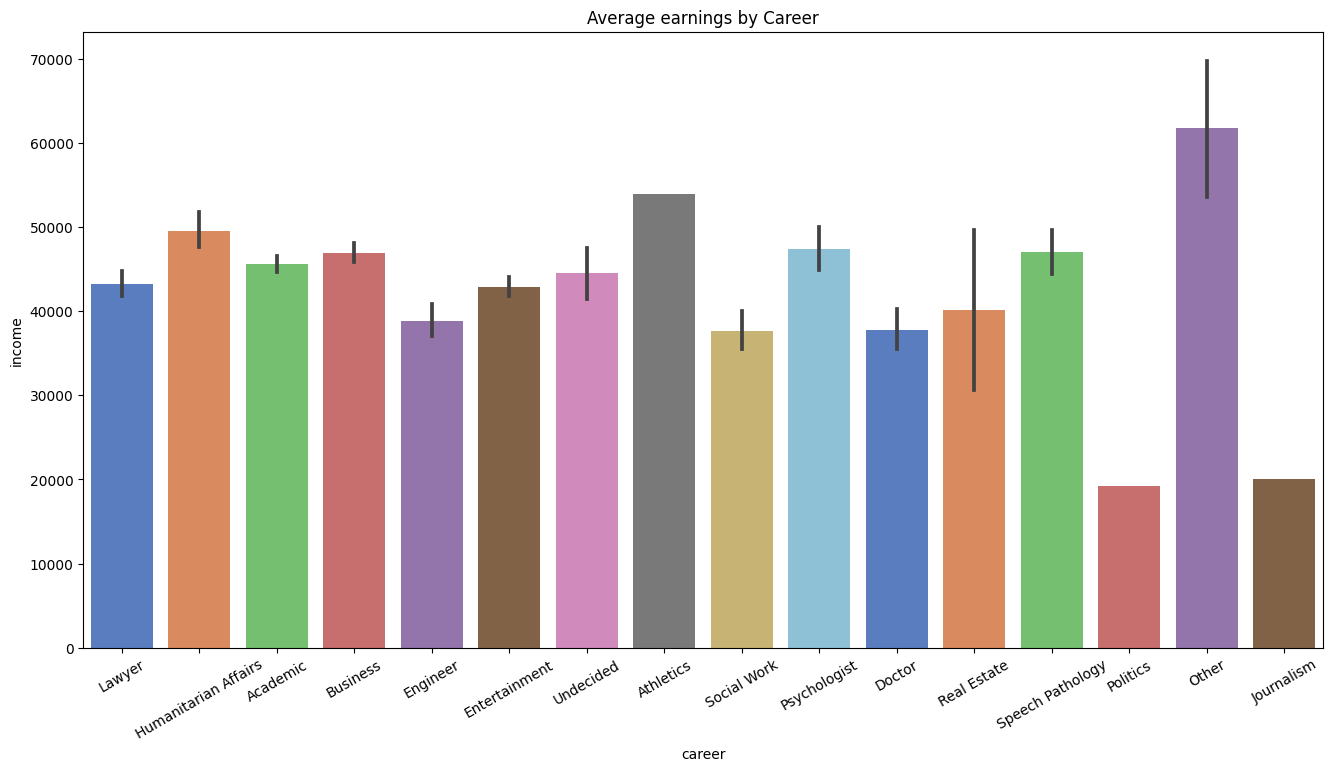

In [302]:
# highest earning careers
plt.figure(figsize=(16,8))
sns.barplot(data=income_df,
            x="career",
            y="income",
            palette="muted")
plt.xticks(rotation=30)
plt.title("Average earnings by Career")
plt.show()

In [303]:
# get average age for every profession with a for loop
age_dict = {}
for i in np.arange(0,18):
    avg_age_profession = round(df[df["career_c"]==i]["age"].mean(),2)
    age_dict[i] = avg_age_profession

In [304]:
profession_match["age"] = age_dict
profession_match.sort_values(by="match_percentage", ascending=False)

,career,match_percentage,quantity,age
13,Athletics,30.00,10,24.99
2,Psychologist,20.69,261,26.81
0,Lawyer,19.85,675,NaN
15,Journalism,18.18,44,28.58
6,Business,17.97,2170,26.65
14,Other,16.88,77,21.00
3,Doctor,16.63,421,24.38
10,Social Work,15.91,220,24.78
5,Entertainment,15.88,724,24.75
1,Academic,15.52,2320,24.40


#### In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

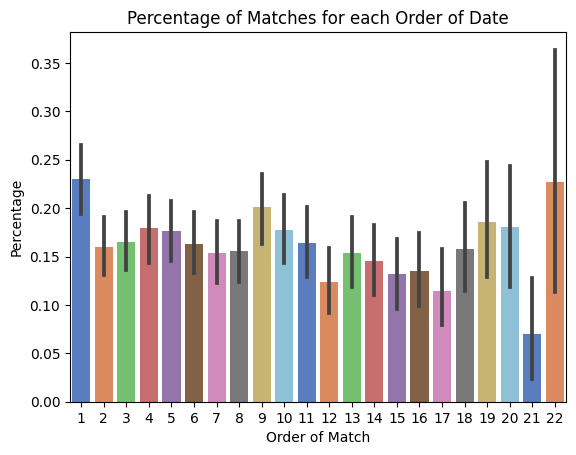

In [305]:
# percentage of matches for each order of date
# does order have any influence on matches?
sns.barplot(data=df, x="order",
            y="match",
            palette="muted")
plt.title("Percentage of Matches for each Order of Date")
plt.ylabel("Percentage")
plt.xlabel("Order of Match")
plt.show()

## Conclusions
- Ratings of attributes are the best predictors for matches and dates.
- Atractiveness is the most important attribute. It is what people look for the most, specially men, and naturally people who are rated as attractive get more dates.
- People rate themselves higher than other people rate them, they have a better perspective of themselves than other people do of them.
- Participants have a good sense of when they are liked by their partner.
- Interests do not have any correlation with getting a date.
- First date of the night has the highest match percentage.
- Psychologists, Lawyers and Businesspeople are the most successful when it comes to dating.